In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv(r"C:\Users\ligio\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'].fillna(0, inplace=True)

In [8]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [9]:
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# EDA Performing

In [10]:
gender_count=df['gender'].value_counts()
gender_count

gender
Male      3555
Female    3488
Name: count, dtype: int64

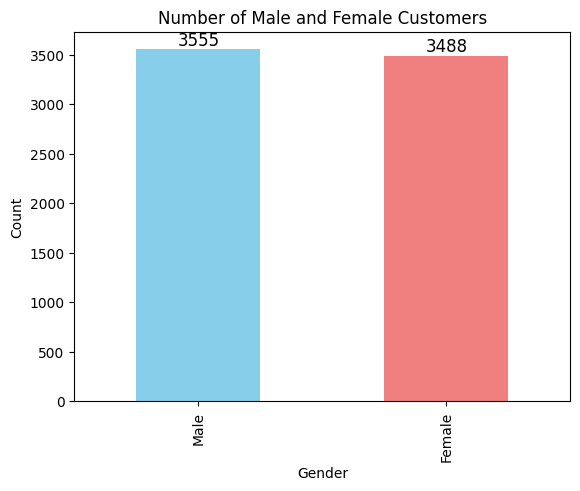

In [11]:
gender_count=df['gender'].value_counts()
ax = gender_count.plot(kind='bar', color=['skyblue', 'lightcoral'])

for i, count in enumerate(gender_count):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Number of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

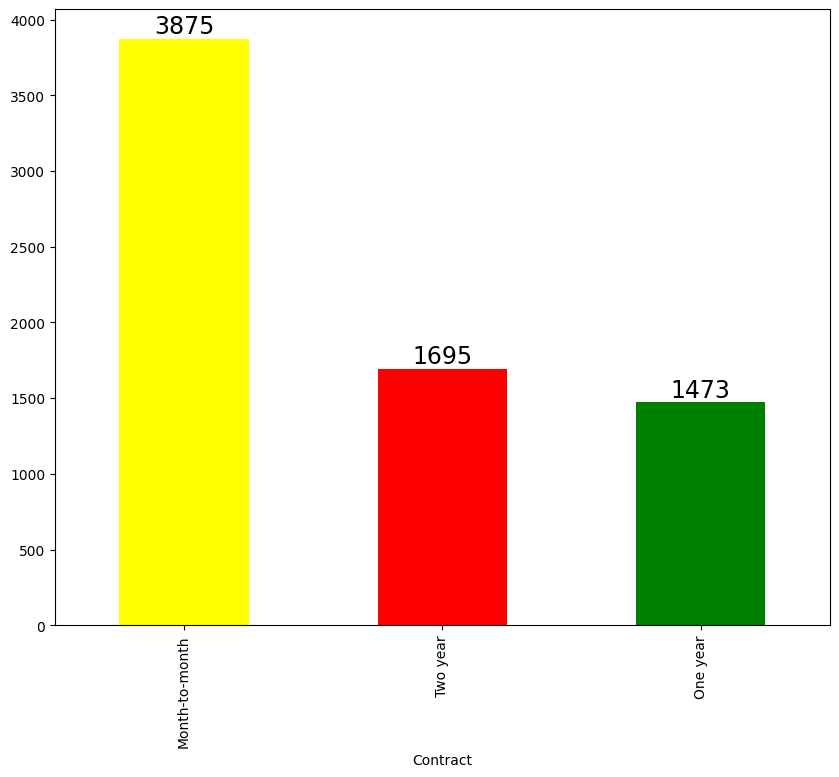

In [12]:
t = df['Contract'].value_counts()
plt.figure(figsize=(10,8))
ax1 = t.plot(kind='bar',color=['yellow','red','green'])

for i ,count in enumerate(t):
    ax1.text(i,count+2,str(count),ha='center',va='bottom',fontsize=17)


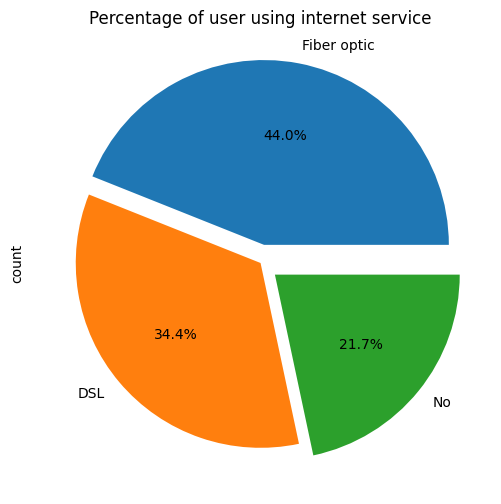

In [13]:
inter = df['InternetService'].value_counts()
plt.figure(figsize=(10,6))
ax2 = inter.plot(kind='pie',color=['skyblue','pink','voilet'],explode = (0.1, 0,0.1), autopct='%1.1f%%')
plt.title('Percentage of user using internet service')
plt.show()

In [14]:

cor = df.select_dtypes(include=['number'])
cor.corr(method='pearson')


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


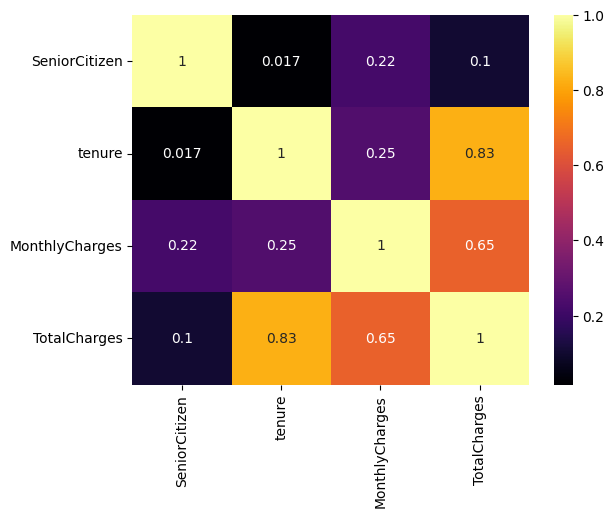

In [15]:
sns.heatmap(cor.corr(method='pearson'),annot=True,cmap='inferno')
plt.show()

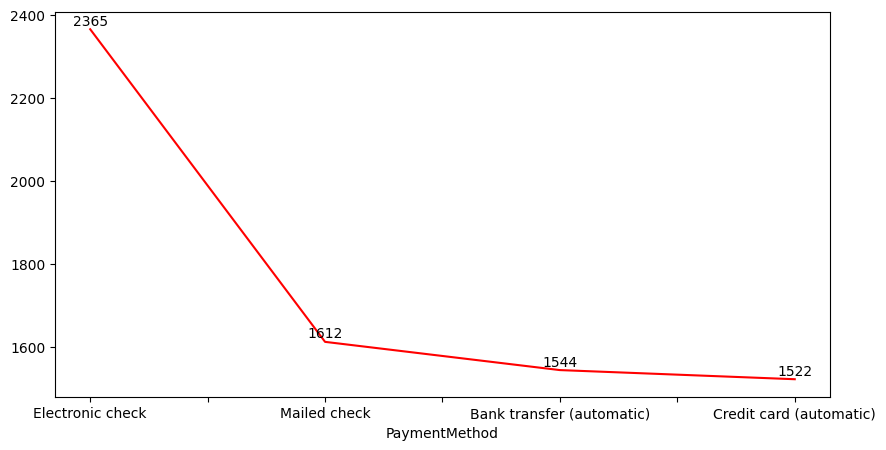

In [16]:
plt.figure(figsize=(10,5))
p = df['PaymentMethod'].value_counts()
ax3=p.plot(kind='line',color='red')
for i,count in enumerate(p):
    ax3.text(i,count+3,str(count),ha='center',va='bottom')
plt.show()


In [17]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

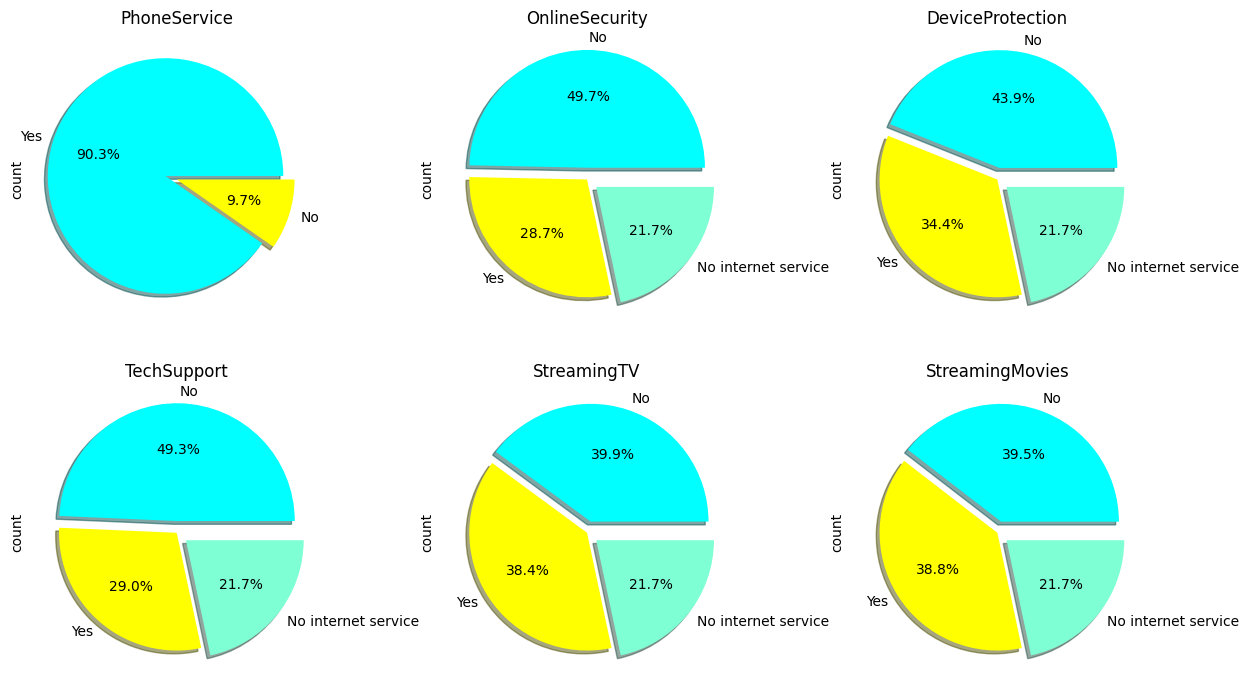

In [18]:
plt.figure(figsize=(15,13))
plt.subplot(3,3,1)
i1 = df['PhoneService'].value_counts()
ax4 = i1.plot(kind='pie',explode = (0.1, 0), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('PhoneService')

plt.subplot(3,3,2)
i2 = df['OnlineSecurity'].value_counts()
ax5 = i2.plot(kind='pie',explode = (0.1, 0,0.1), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('OnlineSecurity')

plt.subplot(3,3,3)
i3 = df['DeviceProtection'].value_counts()
ax6 = i3.plot(kind='pie',explode = (0.1, 0,0.1), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('DeviceProtection')

plt.subplot(3,3,4)
i4 = df['TechSupport'].value_counts()
ax7 = i4.plot(kind='pie',explode = (0.1, 0,0.1), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('TechSupport')

plt.subplot(3,3,5)
i5 = df['StreamingTV'].value_counts()
ax8 = i5.plot(kind='pie',explode = (0.1, 0,0.1), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('StreamingTV')

plt.subplot(3,3,6)
i6 = df['StreamingMovies'].value_counts()
ax9 = i6.plot(kind='pie',explode = (0.1, 0,0.1), autopct='%1.1f%%',shadow=True,colors=['cyan','yellow','aquamarine'])
plt.title('StreamingMovies')

plt.show()

In [19]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [20]:
dff = df.iloc[:,0:]
dff

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
l = ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for column in l:
    le = LabelEncoder()
    dff[column]=le.fit_transform(dff[column])

In [25]:
dff.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [26]:
li = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [28]:
oe = OneHotEncoder(sparse_output=False, drop='first')

In [29]:
for column in li:
    en = oe.fit_transform(dff[[column]])
    end = pd.DataFrame(en,columns=oe.get_feature_names_out([column]))
    dff = pd.concat([dff, end], axis=1)


In [30]:
dff

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
dff.drop(['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'],inplace=True,axis=1)

In [32]:
dff.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
columns = list(dff.columns)
columns.remove('Churn')  
columns.append('Churn')  

df_reordered = dff[columns]



In [34]:
df1 = pd.DataFrame(df_reordered)
df1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [35]:
df1.drop('customerID',axis=1,inplace=True)
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,1,29.85,29.85,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [36]:
x = df1.iloc[:,:-1]
y= df1['Churn']


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [40]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(81.83108587650815, 80.33368832090876)

In [41]:
dr = DecisionTreeClassifier(criterion= 'log_loss',max_depth= 50,min_samples_leaf= 2,min_samples_split= 3,splitter= 'random')
dr.fit(x_train,y_train)
dr.score(x_test,y_test)*100,dr.score(x_train,y_train)*100

(74.02413058907025, 91.88853390131345)

In [42]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)*100,sv.score(x_train,y_train)*100

(73.52732434350602, 73.44692935747248)

In [43]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [44]:
kn = KNeighborsClassifier(algorithm='ball_tree',leaf_size= 40,metric= 'minkowski',n_jobs= 30,n_neighbors= 8,p= 4,weights= 'uniform')
kn.fit(x_train,y_train)
kn.score(x_test,y_test)*100,kn.score(x_train,y_train)*100

(79.4889992902768, 80.65317713880015)

In [45]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_test,y_test)*100,gb.score(x_train,y_train)*100

(66.50106458481191, 65.86794462193824)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
re = RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=30,n_jobs=50)
re.fit(x_train,y_train)
re.score(x_test,y_test)*100,re.score(x_train,y_train)*100

(79.84386089425124, 99.85800496982606)

In [48]:
dt = {'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[20,30,40,50],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3]}

In [49]:
from sklearn.model_selection  import GridSearchCV,RandomizedSearchCV

In [50]:
ge = GridSearchCV( estimator=dr,param_grid=dt,n_jobs=30)
ge.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(criterion='log_loss',
                                              max_depth=50, min_samples_leaf=2,
                                              min_samples_split=3,
                                              splitter='random'),
             n_jobs=30,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [51]:
ge.best_score_

0.7545286768657575

In [52]:
ge.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'random'}

In [53]:
dt1 = { 'n_neighbors':[5,6,7,8,9],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[30,40,50],
    'p':[2,3,4],
    'metric':['minkowski'],
    'n_jobs':[30,40,50]}

In [54]:
ge = GridSearchCV( estimator=kn,param_grid=dt1,n_jobs=30)
ge.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(algorithm='ball_tree', leaf_size=40,
                                            n_jobs=30, n_neighbors=8, p=4),
             n_jobs=30,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_jobs': [30, 40, 50], 'n_neighbors': [5, 6, 7, 8, 9],
                         'p': [2, 3, 4], 'weights': ['uniform', 'distance']})

In [55]:
  ge.best_score_

0.7784862435204987

In [56]:
ge.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 40,
 'metric': 'minkowski',
 'n_jobs': 30,
 'n_neighbors': 8,
 'p': 4,
 'weights': 'uniform'}

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
lis = [('lr',LogisticRegression()),('sv',SVC()),('kn',KNeighborsClassifier())]

In [59]:
vc = VotingClassifier(lis)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('sv', SVC()),
                             ('kn', KNeighborsClassifier())])

In [60]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(81.04366347177849, 80.34066713981547)

In [61]:
p = {'lr':lr.predict(x_test),'sv':sv.predict(x_test),'kn':kn.predict(x_test),'vc':vc.predict(x_test)}

In [62]:
pd.DataFrame(p).head(50)

,lr,sv,kn,vc
0,1,0,1,1
1,0,0,0,0
2,0,0,0,0
3,1,0,1,1
4,0,0,0,0
5,0,0,0,0
6,0,0,1,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [63]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [64]:
c = confusion_matrix(y_test,y_pred=vc.predict(x_test))
c

array([[991,  45],
       [232, 141]], dtype=int64)

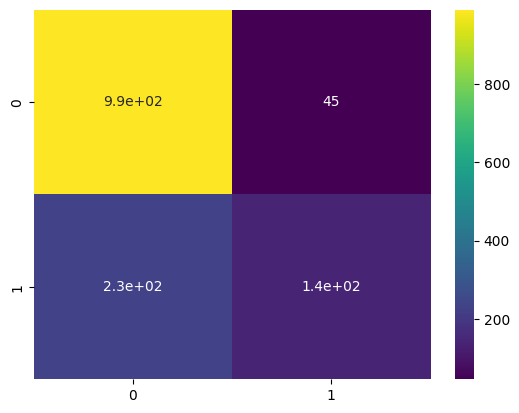

In [65]:
sns.heatmap(c,annot=True,cmap='viridis')
plt.show()

In [66]:
 precision_score(y_test,y_pred=vc.predict(x_test))*100

75.80645161290323

In [67]:
 recall_score(y_test,y_pred=vc.predict(x_test))*100

37.801608579088466

In [68]:
f1_score(y_test,y_pred=vc.predict(x_test))*100

50.44722719141323

In [69]:
import pickle

In [70]:
pickle.dump(vc,open('churn.pkl','wb'))

In [71]:
p = pickle.load(open('churn.pkl','rb'))

In [82]:
p.predict([[1,1,1,0,1,0,1,24,77,1.0,1,0.0,0.0,1,0.0,0.0,1.0,0.0,1,0.0,0.0,0.0,1,0.0,1,0.0,1,0.0,1.0,0.0]])

array([0])